The test dataset contains four cloud detection categories:

| category           | count | relative |
| ------------------ | ----- | -------- |
| unknown            |     4 | 28.6%    |
| cloud_free         |     2 | 14.3%    |
| probably_cloudy    |     3 | 21.4%    |
| most_likely_cloudy |     5 | 35.7%    |

Note that the relative counts don't correspond to cloud fractions as the undefined values should not be taken into account for the computation of cloud fractions.

The true cloud fractions are:
* `probably_cloudy`: 30%
* `most_likely_cloudy`: 50%
* total (any of the two): 80%

In [1]:
library(ncdf4)

In [2]:
nc <- nc_open("test_cloud_flag_nofill.nc")

In [3]:
cloud_flag <- ncvar_get(nc,"cloud_flag")
cloud_flag

[1] -1  0  1  2  1  2  0  1  2  2 -1 -1 -1  2

In [4]:
typeof(cloud_flag)

[1] "integer"

This is nice, `cloud_flag` is decoded as `integer`, all flag values are preserved.

# Mean cloudiness
This one is obviously wrong as the flag is not intended to be used as a numeric value:

In [5]:
mean(cloud_flag)

[1] 0.6428571

this is wrong. But in principle we knew it.

Let's have a look at the meanings:

In [6]:
meanings <- ncatt_get(nc, "cloud_flag", "flag_values")$value
names(meanings) <- unlist(strsplit(ncatt_get(nc, "cloud_flag", "flag_meanings")$value, " "))
meanings

unknown         cloud_free    probably_cloudy most_likely_cloudy 
                -1                  0                  1                  2

Perfect, there are four classes. Let's check the cloud fraction:

In [7]:
mean(cloud_flag == meanings["most_likely_cloudy"])

[1] 0.3571429

Hmm, that is not nice...

Ok, lets go check all of those flags individually:

In [8]:
valid_meanings <- c("cloud_free", "probably_cloudy", "most_likely_cloudy")
total <- 0
for (m in valid_meanings) {
    total <- total + sum(cloud_flag == meanings[m])
}
sum(cloud_flag == meanings["most_likely_cloudy"]) / total

[1] 0.5

Ok, at least now, we get the right number :-) But that's really cumbersome.

# how does the data look without thinking about it?

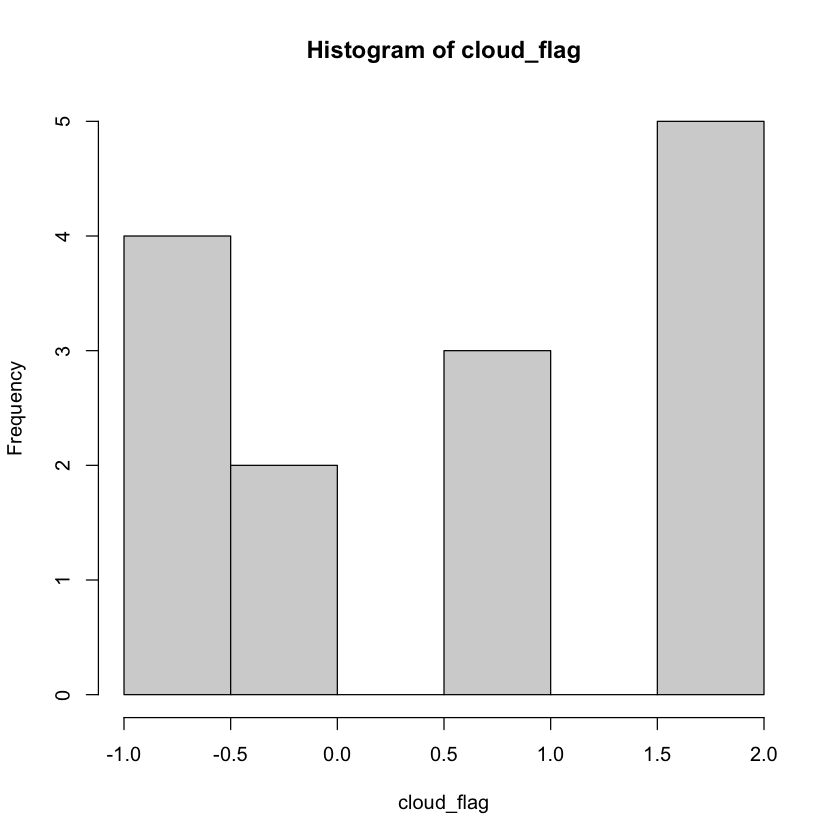

In [9]:
hist(cloud_flag)